In [1]:
#THIS PROJECT IS ON THE CURRENT ANALYSIS OF CORONA DISEASE IN INDIA

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd#importing panda library to preform analytcal function on data
import numpy as np#improting numpy library to perform mathematical function on datda
import matplotlib.pyplot as plt#importing matplot library to show data in graph
import seaborn as sns#imporitng seaborn library to show realation b/w independed and depended variables in graph form
import json#to read json file
import plotly as py


In [4]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
dataframe = pd.read_json("https://www.mohfw.gov.in/data/datanew.json")#to read json file
indian_states = json.load(open("states_india.geojson"))


In [5]:
#giving the jest of data


data=dataframe.copy()
data = data.drop([36], axis=0)
data.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000
mean,19.277778,2792.861111,9.607728e+05,9.449528e+05,13027.222222,2750.638889,9.610216e+05,9.452363e+05,13034.638889
std,10.843329,7770.691295,1.440946e+06,1.413022e+06,24553.326505,7624.241321,1.441449e+06,1.413628e+06,24564.510472
min,1.000000,1.000000,7.683000e+03,7.546000e+03,4.000000,1.000000,7.683000e+03,7.548000e+03,4.000000
25%,10.750000,114.500000,8.470850e+04,8.359350e+04,822.250000,113.750000,8.472375e+04,8.360325e+04,823.000000
50%,19.500000,280.500000,4.762450e+05,4.651635e+05,5619.000000,284.000000,4.762615e+05,4.651790e+05,5621.500000
75%,28.250000,2117.750000,1.017304e+06,1.004228e+06,13804.500000,2158.750000,1.017387e+06,1.004304e+06,13805.250000
max,37.000000,45138.000000,6.634980e+06,6.482493e+06,140962.000000,44314.000000,6.635658e+06,6.483435e+06,140997.000000


In [6]:


data=dataframe.copy()
data = data.drop([36], axis=0)
dataframe.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,8,7683,7546,129,6,7683,7548,129,35
1,1,Andhra Pradesh,2102,2072725,2056184,14439,2149,2072909,2056318,14442,28
2,3,Arunachal Pradesh,35,55273,54958,280,35,55276,54961,280,12
3,4,Assam,2595,616708,608015,6098,2625,616852,608124,6103,18
4,5,Bihar,39,726219,716517,9663,36,726223,716524,9663,10


In [7]:
dataframe.isnull().sum()#to find if there is any missing value

sno             0
state_name      0
active          0
positive        0
cured           0
death           0
new_active      0
new_positive    0
new_cured       0
new_death       0
state_code      0
dtype: int64

In [8]:
#here we find the all the numerical value present in data

numerical_ft=[]#create a list
data=dataframe.copy()#to make copy of data so no change occur on orignal
for feature in data.columns:#to starting a loop in every feature in data
    if data[feature].dtypes !="O":#eliminate any data wich is of object type
        numerical_ft.append(feature)#keep the rest data in list

In [9]:
numerical_ft

['sno',
 'active',
 'positive',
 'cured',
 'death',
 'new_active',
 'new_positive',
 'new_cured',
 'new_death']

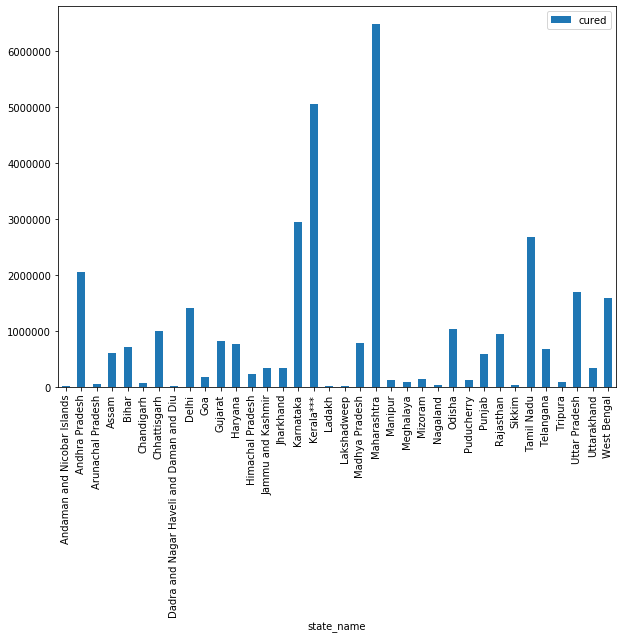

In [10]:
data=dataframe.copy()
data = data.drop([36], axis=0)
data.groupby(['state_name']).sum().plot(kind='bar', y='cured',figsize=(10,7))

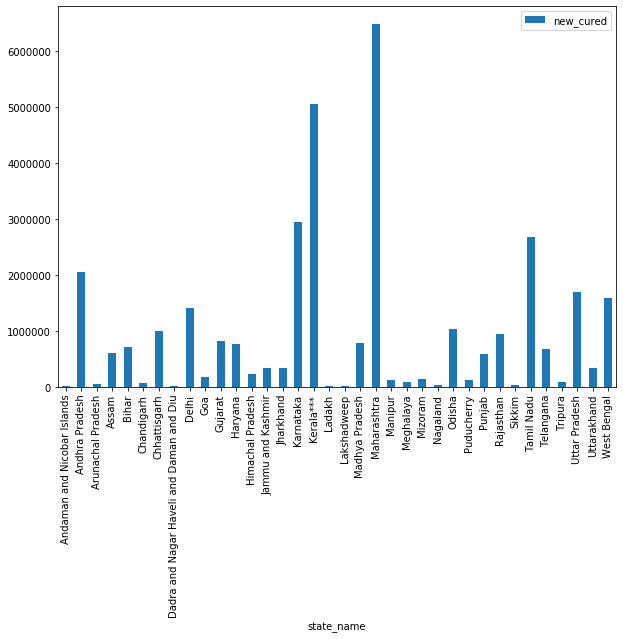

In [11]:
data=dataframe.copy()
data = data.drop([36], axis=0)
data.groupby(['state_name']).sum().plot(kind='bar', y='new_cured',figsize=(10,7))

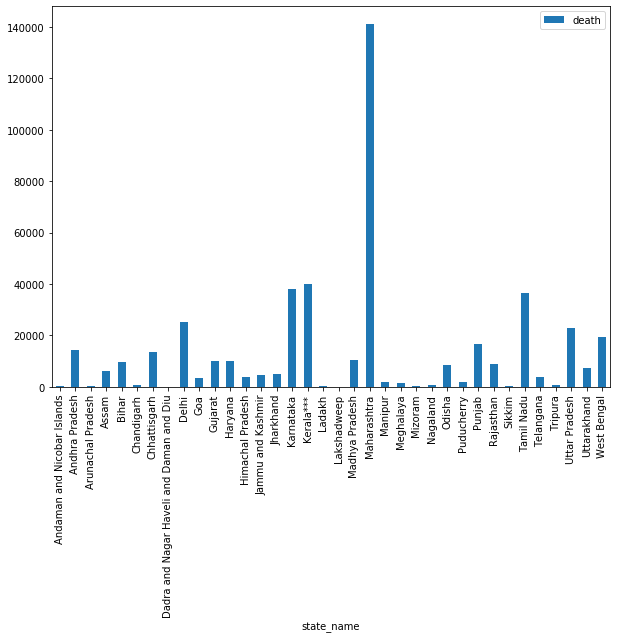

In [12]:
data=dataframe.copy()
data = data.drop([36], axis=0)
data.groupby(['state_name']).sum().plot(kind='bar', y='death',figsize=(10,7))

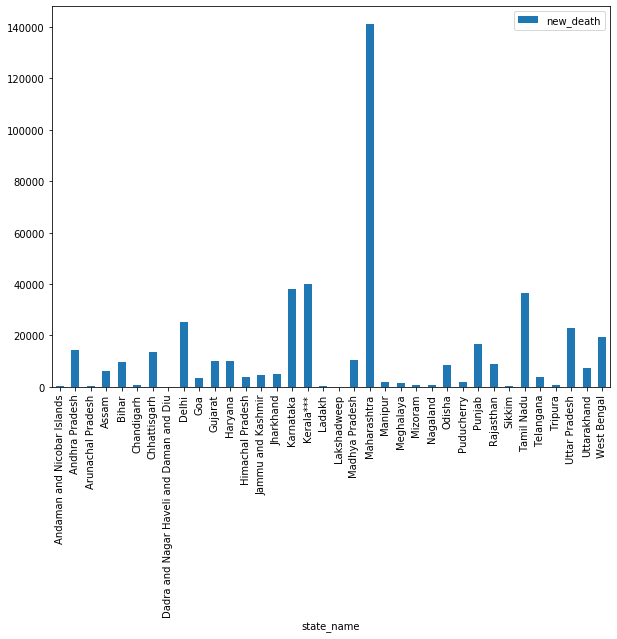

In [13]:
data=dataframe.copy()
data = data.drop([36], axis=0)
data.groupby(['state_name']).sum().plot(kind='bar', y='new_death',figsize=(10,7))

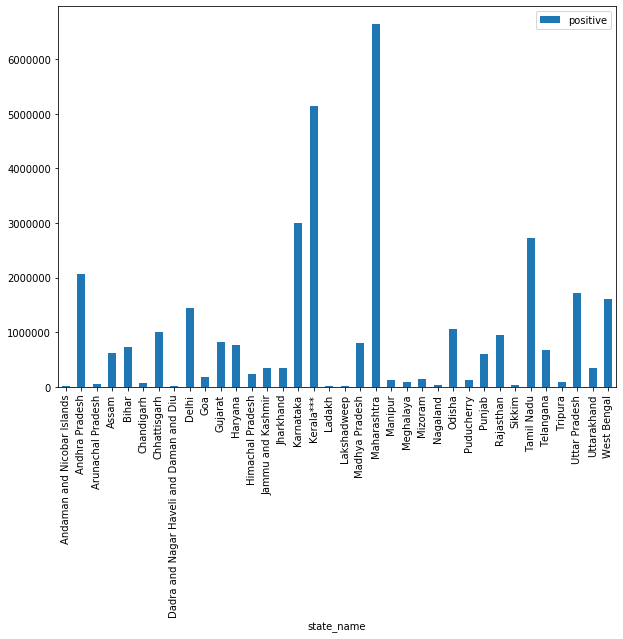

In [14]:
data=dataframe.copy()
data = data.drop([36], axis=0)
data.groupby(['state_name']).sum().plot(kind='bar', y='positive',figsize=(10,7))

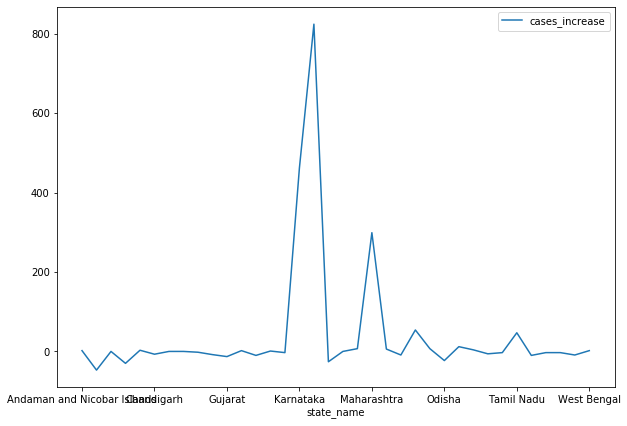

In [15]:

data = dataframe.copy()
data = data.drop([36], axis=0)
data['cases_increase']= data['active']-data['new_active']
data.groupby(['state_name']).sum().plot(kind='line', y='cases_increase',figsize=(10,7))



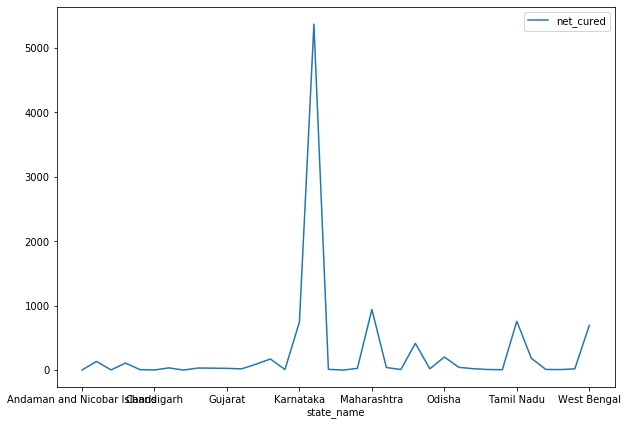

In [16]:

data = dataframe.copy()
data = data.drop([36], axis=0)
data['net_cured']= data['new_cured']-data['cured']
data.groupby(['state_name']).sum().plot(kind='line', y='net_cured',figsize=(10,7))


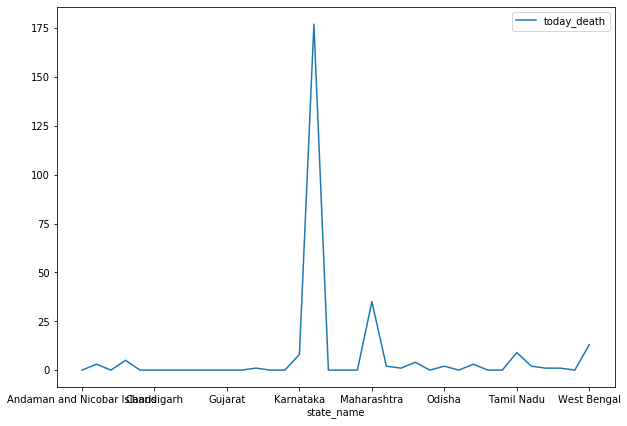

In [17]:

data = dataframe.copy()
data = data.drop([36], axis=0)
data['today_death']= data['new_death']-data['death']
data.groupby(['state_name']).sum().plot(kind='line', y='today_death',figsize=(10,7))


In [18]:
#to find top seven active cases state
data=dataframe.copy()
data = data.drop([36], axis=0)
top1 = data.nlargest(7, ['active'])
top1

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
16,18,Kerala***,45138,5137091,5051998,39955,44314,5141814,5057368,40132,32
20,22,Maharashtra,11525,6634980,6482493,140962,11226,6635658,6483435,140997,27
30,32,Tamil Nadu,8291,2726197,2681434,36472,8244,2726917,2682192,36481,33
35,37,West Bengal,7733,1615378,1588172,19473,7731,1616083,1588866,19486,19
15,17,Karnataka,6907,2995857,2950747,38203,6445,2996148,2951492,38211,29
23,25,Mizoram,3805,134810,130512,493,3751,135175,130927,497,15
31,34,Telangana,3581,675798,668227,3990,3591,675994,668411,3992,36


In [19]:
#to find top seven state cured
data=dataframe.copy()
data = data.drop([36], axis=0)
top2=data.nlargest(7, ['cured'])
top2

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
20,22,Maharashtra,11525,6634980,6482493,140962,11226,6635658,6483435,140997,27
16,18,Kerala***,45138,5137091,5051998,39955,44314,5141814,5057368,40132,32
15,17,Karnataka,6907,2995857,2950747,38203,6445,2996148,2951492,38211,29
30,32,Tamil Nadu,8291,2726197,2681434,36472,8244,2726917,2682192,36481,33
1,1,Andhra Pradesh,2102,2072725,2056184,14439,2149,2072909,2056318,14442,28
34,36,Uttar Pradesh,86,1710387,1687391,22910,89,1710399,1687399,22911,09
35,37,West Bengal,7733,1615378,1588172,19473,7731,1616083,1588866,19486,19


In [20]:
#to find top seven state with death number
data=dataframe.copy()
data = data.drop([36], axis=0)
top3=data.nlargest(7, ['death'])
top3

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
20,22,Maharashtra,11525,6634980,6482493,140962,11226,6635658,6483435,140997,27
16,18,Kerala***,45138,5137091,5051998,39955,44314,5141814,5057368,40132,32
15,17,Karnataka,6907,2995857,2950747,38203,6445,2996148,2951492,38211,29
30,32,Tamil Nadu,8291,2726197,2681434,36472,8244,2726917,2682192,36481,33
8,10,Delhi,285,1440900,1415517,25098,287,1440934,1415549,25098,07
34,36,Uttar Pradesh,86,1710387,1687391,22910,89,1710399,1687399,22911,09
35,37,West Bengal,7733,1615378,1588172,19473,7731,1616083,1588866,19486,19


In [21]:
dt=dataframe['death']
dt.nlargest(7)

36    468980
20    140962
16     39955
15     38203
30     36472
8      25098
34     22910
Name: death, dtype: int64

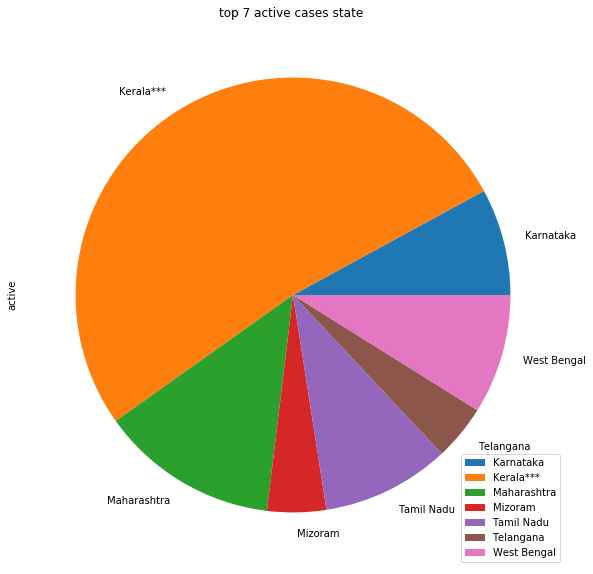

In [22]:
#to plot graph to show the data for analysis
top1.groupby(['state_name']).sum().plot(kind='pie', y='active',figsize=(10,10),title='top 7 active cases state ',fontsize=10)

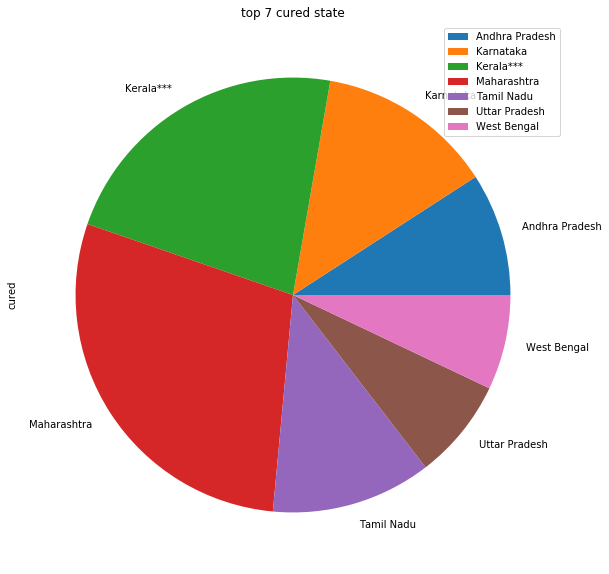

In [23]:
top2.groupby(['state_name']).sum().plot(kind='pie', y='cured',figsize=(10,10),title='top 7 cured state',fontsize=10)

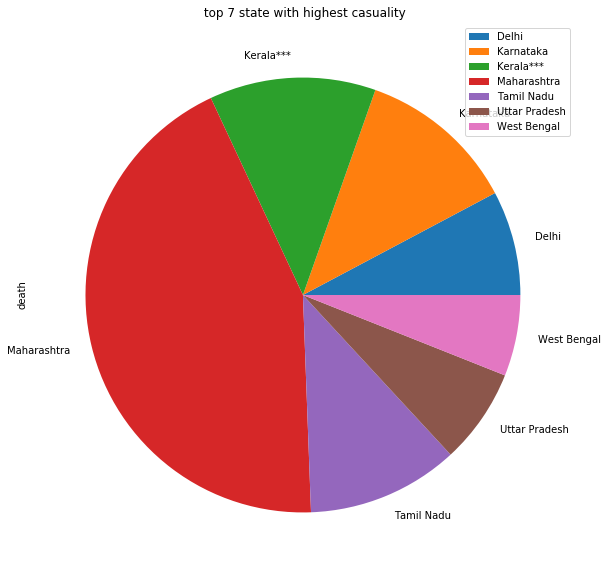

In [24]:
top3.groupby(['state_name']).sum().plot(kind='pie', y='death',figsize=(10,10),title=' top 7 state with highest casuality',fontsize=10)